In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder='/content/drive/MyDrive/Colab Notebooks/B1/'

In [ ]:
photos,labels = list(),list()

In [ ]:
for file in listdir(folder):
  output=0.0
  if file.startswith('Dep'):
    output=1.0
  if file.startswith('TamOn'):
    output=2.0
  if file.startswith('Xau'):
    output=3.0
  photo = load_img(folder+file,target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/photo_B1.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/label_B1.npy',labels)

In [ ]:
print(photos.shape)
print(labels.shape)

(34, 200, 200, 3)
(34,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(23, 200, 200, 3)
(11, 200, 200, 3)


In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical #One_hot_key
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
print(train_x.shape)
print(y_train.shape)

(23, 200, 200, 3)
(23, 4)


In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 4 #3 đầu ra thì lớp là 4 để biển diễn được lớp thứ 0

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=10,epochs=50,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
3/3 [==============================] - 10s 157ms/step - loss: 24.6453 - accuracy: 0.3913
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 7.4667 - accuracy: 0.4783
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 1.9724 - accuracy: 0.6957
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 3.7579 - accuracy: 0.4348
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 1.6560 - accuracy: 0.6087
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6033 - accuracy: 0.7391
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.4438 - accuracy: 0.8696
Epoch 8/50
3/3 [==============================] - 0s 29ms/step - loss: 1.2858 - accuracy: 0.7826
Epoch 9/50
3/3 [==============================] - 0s 32ms/step - loss: 1.1105 - accuracy: 0.6957
Epoch 10/50
3/3 [==============================] - 0s 31ms/step - loss: 0.8387 - accuracy: 0.6957
Epoch 11/50
3/3 [=========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/B1.h5')

1/1 [==============================] - 0s 226ms/step
[3]
Tình cảm lận đận


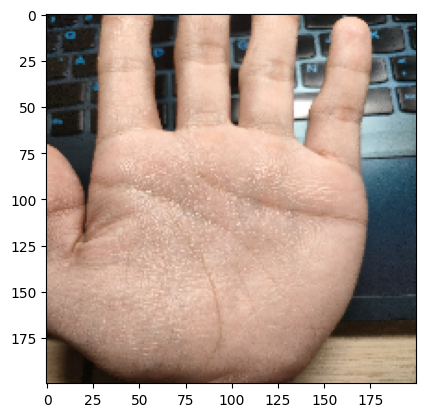

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('Test1.jpg',target_size=(200,200,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đường tình duyên tốt, cuộc sống vui tươi")
if (a == 2):
  print("Tạm ổn, tình cảm có lúc sóng gió. ")
if (a == 3):
  print("Tình cảm lận đận")